# Task 3: Evaluate Techniques for Wifi Locationing 

# 0_PREPROCESSING Test Data


# Import libraries

In [2]:
# basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [3]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/UJIndoorLoc/'
file = 'trainingData.csv'

Tdata = pd.read_csv(path + file)

Tdata.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
Tdata.shape

(19937, 529)

## Nulls?

In [5]:
# The any() function returns True if any item in an iterable are true, otherwise it returns False
print(any(Tdata.isnull().sum()))

False


We already check for null values, but you can verify this visually by applying a heat map.
there are a lot of features,and heatmap cant print them all... but you can get an idea. 

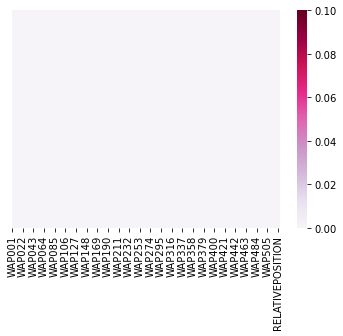

In [6]:
# simple heat map showing where we are missing data
heat_map = sns.heatmap(Tdata.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 0.1)
plt.show()

DataTypes

In [7]:
Tdata.iloc[:,519:529].dtypes

WAP520                int64
LONGITUDE           float64
LATITUDE            float64
FLOOR                 int64
BUILDINGID            int64
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
dtype: object

In [8]:
Tdata.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


## get an idea of the possible WAP values

Seems that the great majority of values of singal strenght is +100 (out of range), a possible way to ignore those values is replace them by a np.nan, as they are not considered in a plot.  A copy of the dataframe will be done...

In [9]:
# Take a random sample of the original dataframe and make a copy
TdataPossibleValues = Tdata.sample(frac =.10, random_state= 200)    # .10 menans takes samples by the 10% of the dataset 

In [10]:
TdataPossibleValues = TdataPossibleValues.drop(['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'], axis = 1)

In [11]:
TdataPossibleValues = TdataPossibleValues.replace([100],np.nan)
TdataPossibleValues.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-83.0,-85.0,NaN,NaN,NaN
2671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/home/ale/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6623: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/ale/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6624: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


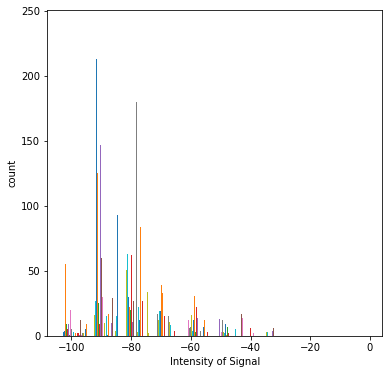

In [40]:
plt.hist(TdataPossibleValues, bins = 10)

plt.xlabel('Intensity of Signal')
plt.ylabel('count')

plt.rcParams['figure.figsize'] = [6,6]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("Signal_hist", format= "png",bbox_inches='tight' )

plt.show();

a bit of zoom always help

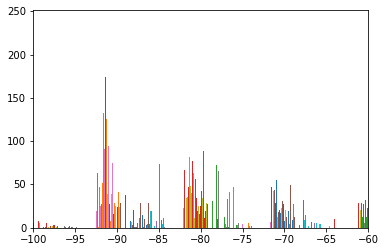

In [12]:
plt.hist(TdataPossibleValues, bins = 10)
plt.xlim(-100,-60)
plt.show;

it's not a randomized sample, just the first 100 hundred rows, but we can get an idea that the most possiblle values are arround -90dB. 

## OUTPUT VARIABLES
the main objective of the project is to use signal strenght to guess the location of the cellphones. 

So our outputs are the location variables: 
- **FLOOR, BUILDING, LAT, LONG**. 

### FLOOR

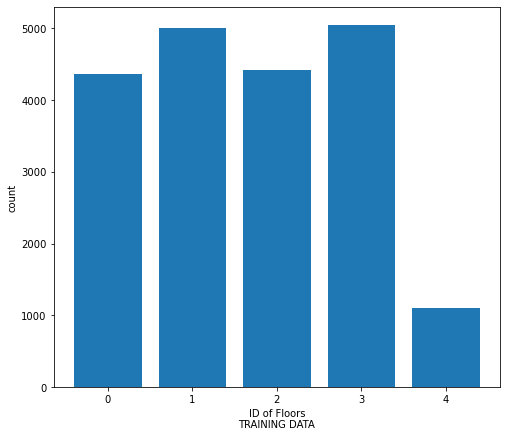

In [14]:
# use plt.bar instead of plt.hist because it can use align='center'. Also removes the float values from the Xaxis
labels, counts = np.unique(Tdata['FLOOR'], return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)

plt.xlabel('ID of Floors\nTRAINING DATA')
plt.ylabel('count')

plt.rcParams['figure.figsize'] = [8,7]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("hist_floor_tra", format= "png",bbox_inches='tight' )

plt.show()

- Umbalanced data, there are a lot of datapoints from FLOORS 0 to 3, and only a few of 4. 
- Perhaps this happends because not all the building have 4 floors. In fact, only BuildingID = 2 has 4 floors. 

### BUILDING ID

In [1]:
labels, counts = np.unique(Tdata["BUILDINGID"], return_counts=True)

plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)

plt.xlabel('ID of Buildings\nTRAINING DATA')
plt.ylabel('count')

plt.rcParams['figure.figsize'] = [8,7]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("hist_buildings_trainig", format= "png",bbox_inches='tight' )

plt.show()

NameError: name 'np' is not defined

- again, quite umbalanced data. Most of data comes from the BuildingID = 2

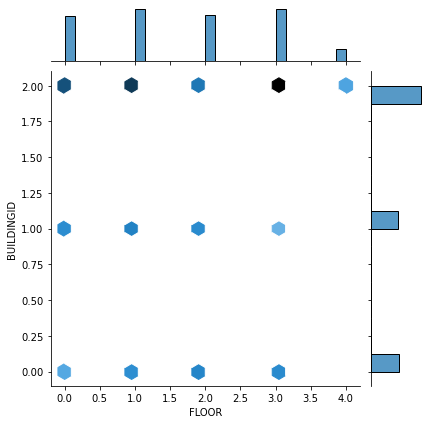

In [31]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=Tdata['FLOOR'], y=Tdata['BUILDINGID'], kind='hex')

plt.rcParams['figure.figsize'] = [5,5]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("floor_Builds", format= "png",bbox_inches='tight' )

plt.show()

it's interesting to combine Floor/Building.
- most of data was collected from buildingID=2. and this is the only one with 4 floors. 

### LATITUDE AND LONGITUDE

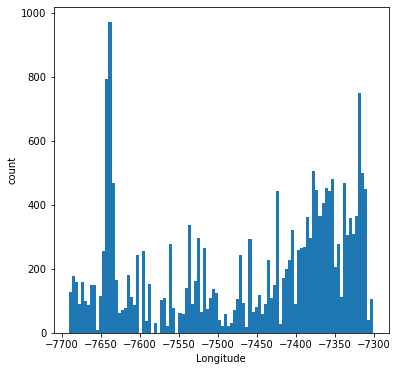

In [38]:
plt.hist(Tdata["LONGITUDE"], bins = 100)

plt.xlabel('Longitude')
plt.ylabel('count')

plt.rcParams['figure.figsize'] = [6,6]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("LONG_hist", format= "png",bbox_inches='tight' )

plt.show()

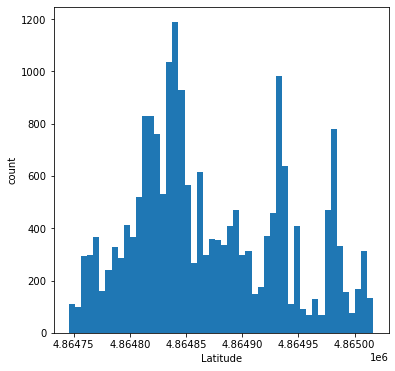

In [39]:
plt.hist(Tdata["LATITUDE"], bins = 50)

plt.xlabel('Latitude')
plt.ylabel('count')

plt.rcParams['figure.figsize'] = [6,6]
#plt.rcParams['figure.figsize'] = [15, 6]

plt.savefig("LAT_hist", format= "png",bbox_inches='tight' )
plt.show()

# Save Data

In [18]:
path = '/home/ale/Dropbox/UBIQUM/4.DeepAnalytics&Visualization/T4M3.WiFiLocationing/Data/'
file = "0_DataPrepro.csv"

Tdata.to_csv(path + file, index = False)


Saved_Tdata = pd.read_csv(path + file)

Saved_Tdata.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
